In [1]:
import pandas as pd

# Notice the 'Data/' before the filename? That tells Python to look in the subfolder.
# If you get a 'FileNotFoundError', double-check the spelling of the folder and file.
df = pd.read_csv('Data/Superstore.csv', encoding='windows-1252')

print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [2]:
# 1. Check for missing values
print("Missing Values Before Cleaning:")
print(df.isnull().sum())

# 2. Drop duplicates (if any exist)
df.drop_duplicates(inplace=True)

# 3. Convert 'Order Date' and 'Ship Date' to datetime objects
# This is crucial for time-series analysis in Power BI later
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# 4. Drop the 'Row ID' column (it's just a row number, we don't need it)
# We use 'errors=ignore' just in case you accidentally run this cell twice
df.drop(columns=['Row ID', 'Country'], errors='ignore', inplace=True)

# 5. Feature Engineering: Create a 'Delivery Days' column
# This calculates how long it took to ship an item
df['Delivery Days'] = (df['Ship Date'] - df['Order Date']).dt.days

# 6. Feature Engineering: Create a 'Year-Month' column for easier sorting
df['Month_Year'] = df['Order Date'].dt.to_period('M')

# Final Check
print("\nData Cleaned Successfully!")
print(df.info())
print("\nFirst 5 rows of the new data:")
print(df.head())

Missing Values Before Cleaning:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Data Cleaned Successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment 

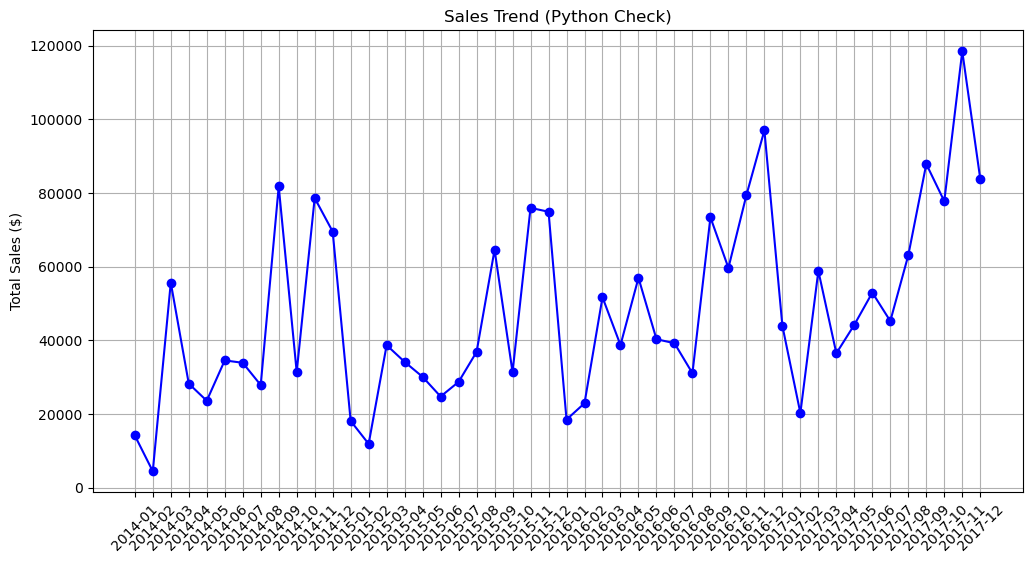

✅ Success! File saved as 'Superstore_Cleaned.csv' in your Data folder.


In [3]:
import matplotlib.pyplot as plt

# --- Part 1: Quick Visual Check (EDA) ---
# Let's group sales by month to see the trend
monthly_sales = df.groupby('Month_Year')['Sales'].sum()

# Convert the period index to string so matplotlib can plot it easily
monthly_sales.index = monthly_sales.index.astype(str)

# Create a simple line chart
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='b')
plt.xticks(rotation=45) # Rotate dates so they don't overlap
plt.title('Sales Trend (Python Check)')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.show()

# --- Part 2: Export for Power BI ---
# We save this as a NEW file. Never overwrite your raw data!
# index=False means "don't write the row numbers 0,1,2..." into the file
df.to_csv('Data/Superstore_Cleaned.csv', index=False)

print("✅ Success! File saved as 'Superstore_Cleaned.csv' in your Data folder.")

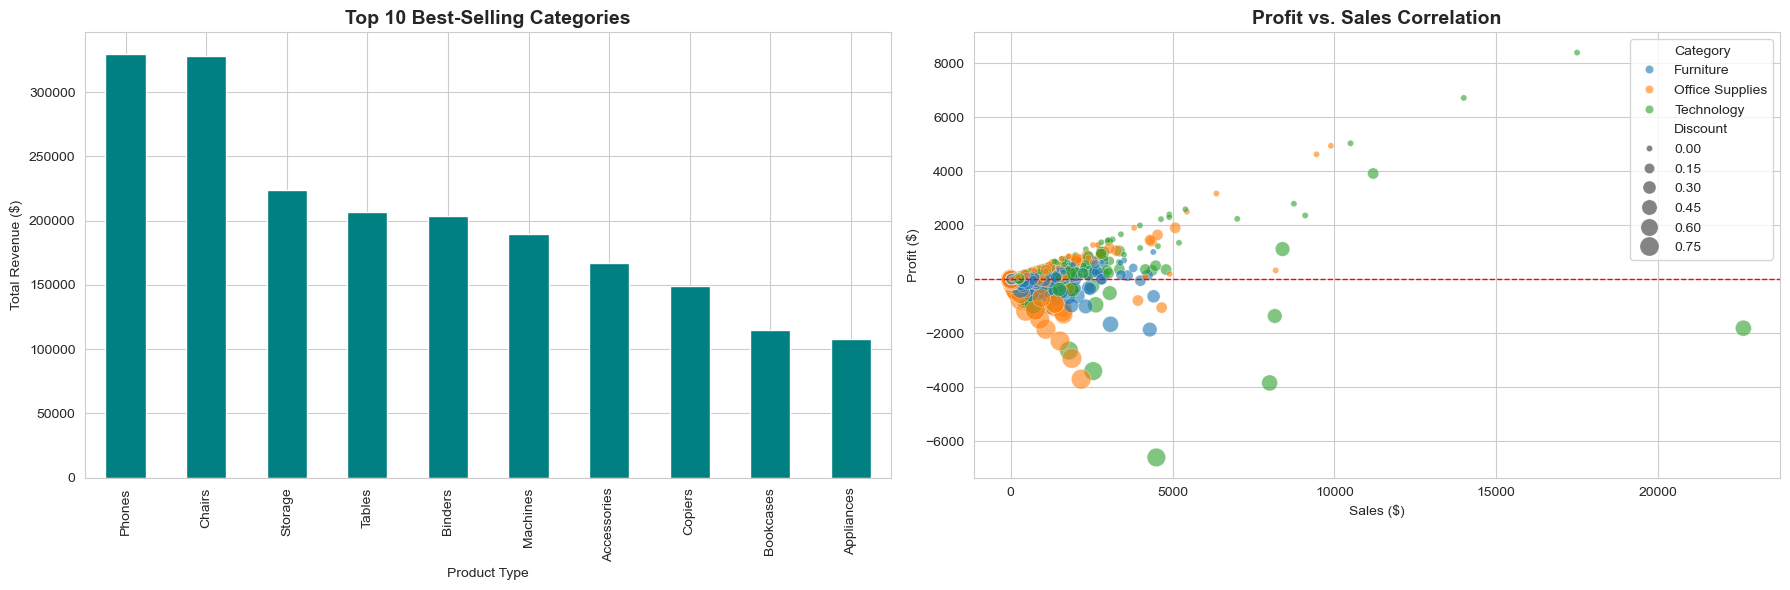

In [4]:
import seaborn as sns

# Set the visual style to look professional
sns.set_style("whitegrid")

# Create a figure with two side-by-side charts
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# --- Graph 2: Top 10 Selling Sub-Categories ---
# Group by Sub-Category, sum the sales, sort them, and take top 10
top_products = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(10)

# Plotting on the first (left) chart
top_products.plot(kind='bar', color='teal', ax=axes[0])
axes[0].set_title('Top 10 Best-Selling Categories', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Total Revenue ($)')
axes[0].set_xlabel('Product Type')

# --- Graph 3: Profit vs Sales (The "Profitability" Check) ---
# Scatter plot to see if high sales = high profit
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Category', size='Discount', sizes=(20, 200), alpha=0.6, ax=axes[1])

axes[1].set_title('Profit vs. Sales Correlation', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Sales ($)')
axes[1].set_ylabel('Profit ($)')
# Add a red line at 0 profit to clearly show losses
axes[1].axhline(0, color='red', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()

🔻 Bottom 5 Sub-Categories by Total Sales:
Sub-Category
Fasteners     3024.280
Labels       12486.312
Envelopes    16476.402
Art          27118.792
Supplies     46673.538
Name: Sales, dtype: float64

🔻 The Single Lowest Transaction Record:
Product: Appliances
Sales Amount: $0.44


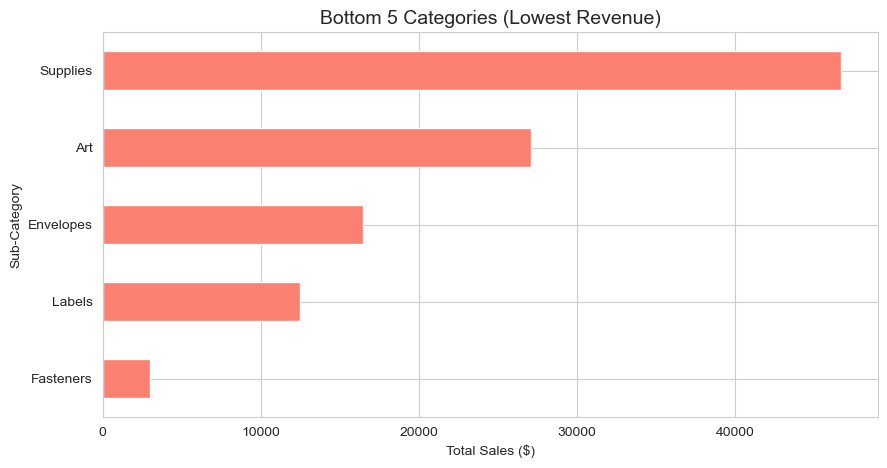

In [5]:
# --- Analysis 1: The "Bottom 5" Performing Products (Total Revenue) ---
# Group by Sub-Category, sum the sales, and sort Ascending (Smallest to Largest)
bottom_products = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=True).head(5)

print("🔻 Bottom 5 Sub-Categories by Total Sales:")
print(bottom_products)

# --- Analysis 2: The Lowest Individual Transaction ---
# Find the single row with the lowest sales value
lowest_sale_transaction = df.loc[df['Sales'].idxmin()]

print("\n🔻 The Single Lowest Transaction Record:")
print(f"Product: {lowest_sale_transaction['Sub-Category']}")
print(f"Sales Amount: ${lowest_sale_transaction['Sales']:.2f}")

# --- Visualizing the Bottom Performers ---
plt.figure(figsize=(10, 5))
# We use 'barh' for a horizontal bar chart
bottom_products.plot(kind='barh', color='salmon')
plt.title('Bottom 5 Categories (Lowest Revenue)', fontsize=14)
plt.xlabel('Total Sales ($)')
plt.show()

❄️ The Month with the Lowest Sales in History:
Year  Month   
2014  February    4519.892
Name: Sales, dtype: float64


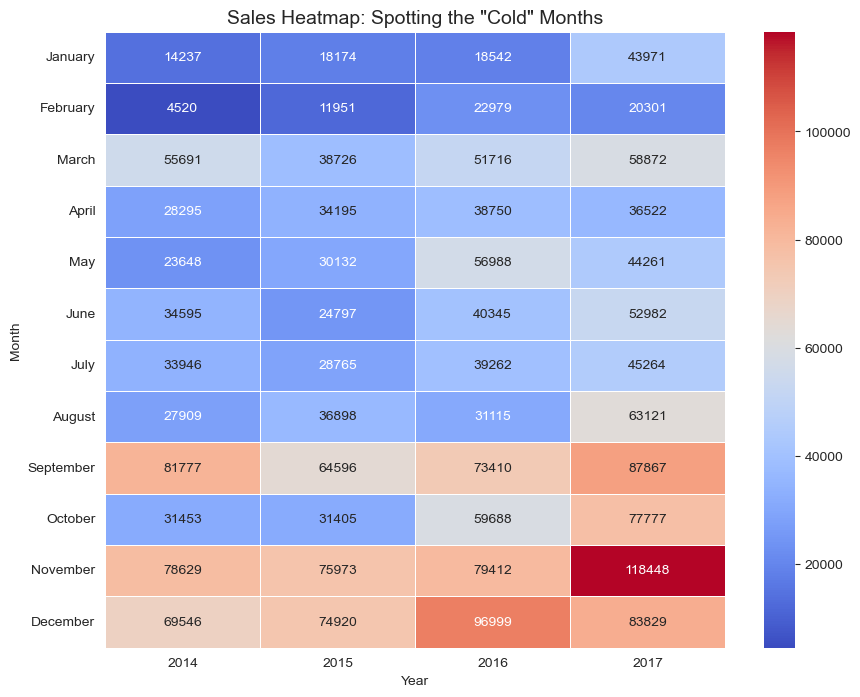

In [6]:
import seaborn as sns

# 1. Create specific Year and Month columns for sorting
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month_name()

# 2. Group by Year and Month to calculate Total Sales for every period
# We create a pivot table: Rows = Months, Columns = Years, Values = Sales
sales_pivot = df.pivot_table(index='Month', columns='Year', values='Sales', aggfunc='sum')

# 3. Sort months in calendar order (otherwise they appear Alphabetically like April, August...)
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
sales_pivot = sales_pivot.reindex(month_order)

# 4. Find the Absolute Lowest Sales Month in history
lowest_month_record = df.groupby(['Year', 'Month'])['Sales'].sum().sort_values(ascending=True).head(1)
print("❄️ The Month with the Lowest Sales in History:")
print(lowest_month_record)

# 5. Visualize it with a Heatmap
# Heatmaps are AMAZING for spotting low sales (lighter colors = lower sales)
plt.figure(figsize=(10, 8))
sns.heatmap(sales_pivot, cmap='coolwarm', annot=True, fmt=".0f", linewidths=.5)
plt.title('Sales Heatmap: Spotting the "Cold" Months', fontsize=14)
plt.ylabel('Month')
plt.xlabel('Year')
plt.show()

📉 The 'Worst' Selling Category for Each Month (Sample):
     Year     Month Sub-Category   Sales
54   2014  February    Fasteners  12.350
132  2014       May    Fasteners  12.576
122  2014     March     Supplies  18.620
84   2014      July    Fasteners  24.348
106  2014      June     Supplies  27.604
69   2014   January    Fasteners  37.060
26   2014    August       Labels  41.376
164  2014   October    Fasteners  51.988
147  2014  November    Fasteners  68.600
40   2014  December    Fasteners  77.842


C:\Users\deeks\AppData\Local\Temp\ipykernel_11928\3514053201.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=winner_of_losers.values, y=winner_of_losers.index, palette='magma')


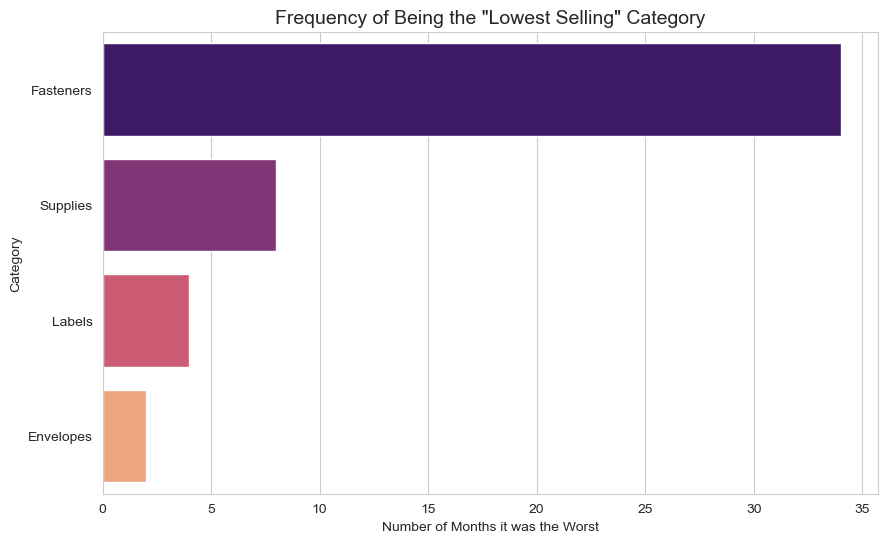

In [7]:
# 1. Aggregate Sales by Year, Month, and Sub-Category
monthly_performance = df.groupby(['Year', 'Month', 'Sub-Category'])['Sales'].sum().reset_index()

# 2. Find the Sub-Category with the Minimum Sales for EACH Month
# This logic groups by Year/Month and picks the row with the lowest sales
worst_performers_idx = monthly_performance.groupby(['Year', 'Month'])['Sales'].idxmin()
worst_performers = monthly_performance.loc[worst_performers_idx]

# 3. Sort by Year to make it readable
worst_performers = worst_performers.sort_values(by=['Year', 'Sales'])

print("📉 The 'Worst' Selling Category for Each Month (Sample):")
print(worst_performers.head(10)) # Showing first 10 rows

# --- Visualization: Who is the "Consistent Loser"? ---
# Instead of plotting a messy line chart, let's count how many times each category was the worst.
winner_of_losers = worst_performers['Sub-Category'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=winner_of_losers.values, y=winner_of_losers.index, palette='magma')
plt.title('Frequency of Being the "Lowest Selling" Category', fontsize=14)
plt.xlabel('Number of Months it was the Worst')
plt.ylabel('Category')
plt.show()

👥 Total Customers: 793
💎 Loyal Customers (Top 20%): 158
💰 Revenue from Loyal Customers: $1,101,781.39
📊 % of Total Revenue they contribute: 47.96%

🏆 Top 5 Most Valuable Customers:
     Customer Name  Total_Orders  Total_Spent
700    Sean Miller             5    25043.050
741   Tamara Chand             5    19052.218
621   Raymond Buch             6    15117.339
730   Tom Ashbrook             4    14595.620
6    Adrian Barton            10    14473.571

🛒 What do Loyal Customers buy the most?
Sub-Category
Machines    161877.481
Phones      151990.466
Chairs      138373.460
Copiers     118288.770
Binders     114773.466
Name: Sales, dtype: float64


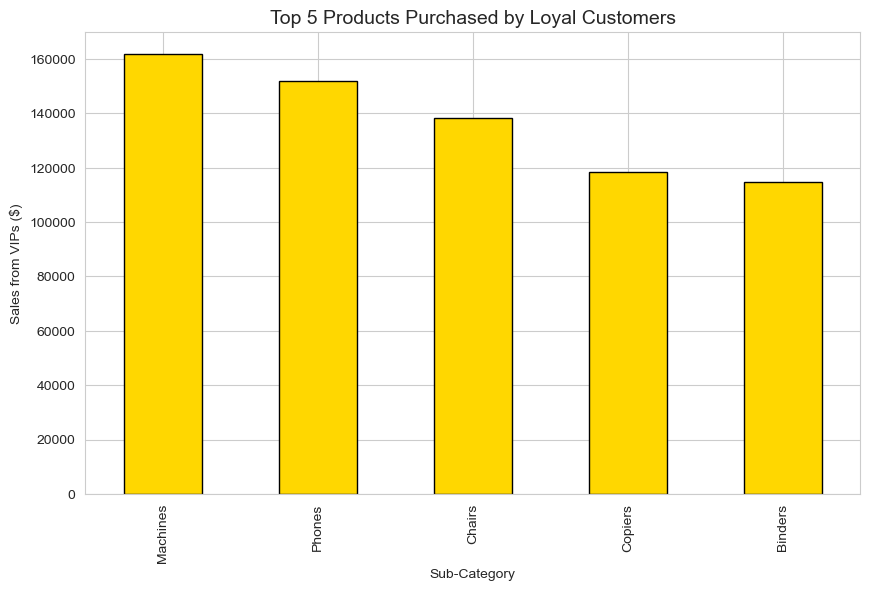

In [8]:
# --- Step 1: Calculate Customer Metrics ---
# We group by Customer ID and Name to ensure accuracy
# 'nunique' counts unique Order IDs (Frequency), 'sum' adds up Sales (Monetary)
customer_stats = df.groupby(['Customer ID', 'Customer Name']).agg({
    'Order ID': 'nunique', 
    'Sales': 'sum'
}).reset_index()

# Rename columns for clarity
customer_stats.columns = ['Customer ID', 'Customer Name', 'Total_Orders', 'Total_Spent']

# --- Step 2: Identify the "Top 20%" (The Loyal Segment) ---
# Sort by Money Spent (Highest to Lowest)
customer_stats = customer_stats.sort_values(by='Total_Spent', ascending=False)

# Calculate how many customers represent the top 20%
total_customers = len(customer_stats)
top_20_percent_count = int(total_customers * 0.20)

# Slice the data to get the list of Loyal Customers
loyal_customers = customer_stats.head(top_20_percent_count)

# --- Step 3: Analyze "What do they buy?" ---
# Get the IDs of these loyal customers
loyal_ids = loyal_customers['Customer ID'].unique()

# Filter the main dataframe to show ONLY transactions from these people
loyal_transactions = df[df['Customer ID'].isin(loyal_ids)]

# Find their favorite products
favorite_products = loyal_transactions.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(5)

# --- Output the Answers ---
print(f"👥 Total Customers: {total_customers}")
print(f"💎 Loyal Customers (Top 20%): {top_20_percent_count}")
print(f"💰 Revenue from Loyal Customers: ${loyal_customers['Total_Spent'].sum():,.2f}")
print(f"📊 % of Total Revenue they contribute: {(loyal_customers['Total_Spent'].sum() / df['Sales'].sum()) * 100:.2f}%")

print("\n🏆 Top 5 Most Valuable Customers:")
print(loyal_customers[['Customer Name', 'Total_Orders', 'Total_Spent']].head(5))

print("\n🛒 What do Loyal Customers buy the most?")
print(favorite_products)

# --- Visualization: The "Gold Mine" ---
plt.figure(figsize=(10, 6))
favorite_products.plot(kind='bar', color='gold', edgecolor='black')
plt.title('Top 5 Products Purchased by Loyal Customers', fontsize=14)
plt.ylabel('Sales from VIPs ($)')
plt.show()

👥 Total Casual Customers: 635
💰 Revenue from Casual Shoppers: $1,195,419.47
📊 Percentage of Total Customers: 80.1%

📦 Top 5 Categories for Casual Shoppers:
Sub-Category
Chairs         190075.6430
Phones         178016.5880
Storage        138520.9420
Accessories    118430.7000
Tables         116714.1805
Name: Sales, dtype: float64

🎲 Random Sample of 3 Casual Shoppers & What They Bought:
          Customer Name Order Date Sub-Category    Sales
2870      Beth Fritzler 2014-03-22        Paper   74.352
2871      Beth Fritzler 2014-03-22       Chairs  314.352
6351      Beth Fritzler 2017-11-03       Phones  361.376
8037      Beth Fritzler 2017-07-10   Appliances   41.910
5048  Dorothy Dickinson 2014-03-31      Binders    8.134
7394  Dorothy Dickinson 2017-05-02        Paper   34.400
7393  Dorothy Dickinson 2017-05-02          Art   59.520
7392  Dorothy Dickinson 2017-05-02        Paper   15.700
5115  Dorothy Dickinson 2017-07-25       Labels    3.304
5049  Dorothy Dickinson 2014-03-31  Acce

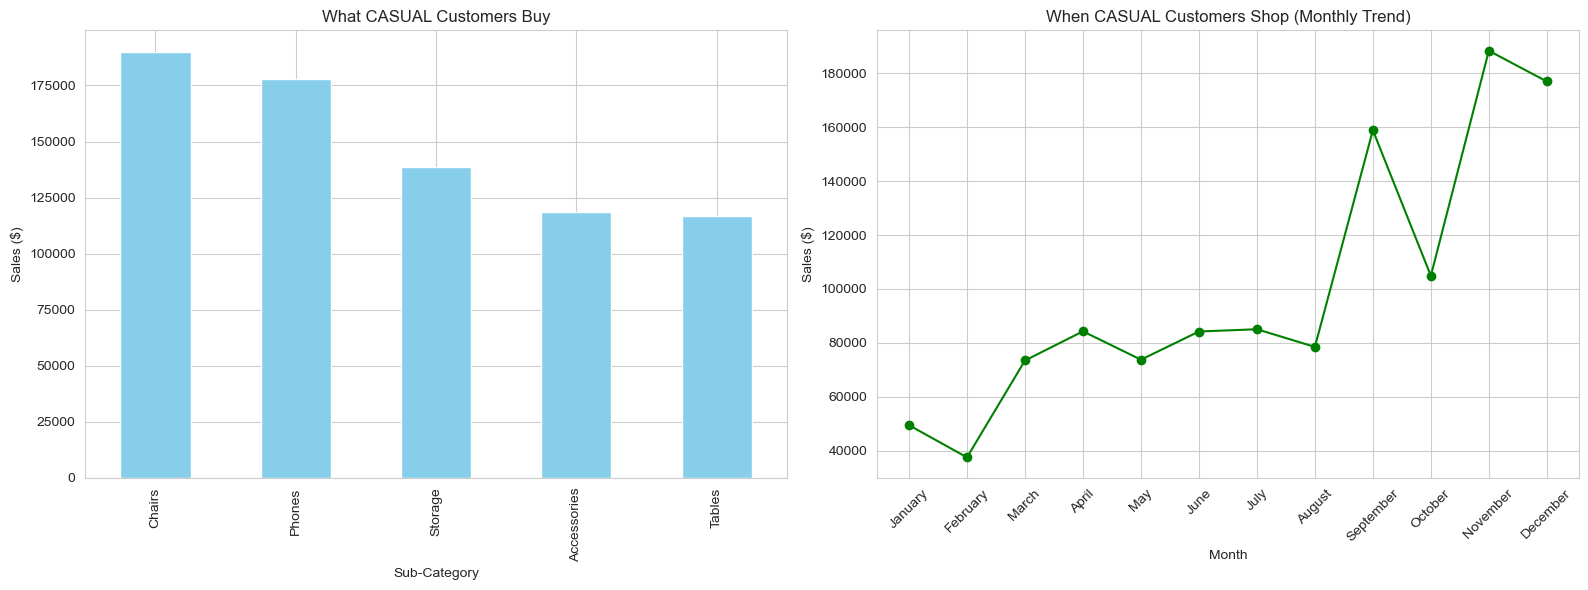

In [9]:
# --- Step 1: Separate the "Casual" Customers ---
# We use the tilde (~) symbol which means "NOT".
# So this reads: "Select rows where Customer ID is NOT in the loyal_ids list"
casual_shoppers_df = df[~df['Customer ID'].isin(loyal_ids)]

# --- Step 2: What do Casual Customers buy? ---
casual_preferences = casual_shoppers_df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(5)

# --- Step 3: When do they shop? (Seasonality) ---
# Group by Month to see if they are "Holiday Shoppers"
casual_trends = casual_shoppers_df.groupby('Month')['Sales'].sum()
# Sort by calendar order
casual_trends = casual_trends.reindex(month_order)

# --- Step 4: Pick 3 Random Customers to see their specific history ---
import random
random_ids = random.sample(list(casual_shoppers_df['Customer ID'].unique()), 3)
random_customers = casual_shoppers_df[casual_shoppers_df['Customer ID'].isin(random_ids)]

# --- Output the Analysis ---
print(f"👥 Total Casual Customers: {casual_shoppers_df['Customer ID'].nunique()}")
print(f"💰 Revenue from Casual Shoppers: ${casual_shoppers_df['Sales'].sum():,.2f}")
print(f"📊 Percentage of Total Customers: {(casual_shoppers_df['Customer ID'].nunique() / df['Customer ID'].nunique()) * 100:.1f}%")

print("\n📦 Top 5 Categories for Casual Shoppers:")
print(casual_preferences)

print("\n🎲 Random Sample of 3 Casual Shoppers & What They Bought:")
# Display specific purchase details for these random people
print(random_customers[['Customer Name', 'Order Date', 'Sub-Category', 'Sales']].sort_values(by='Customer Name'))

# --- Visualization: Loyal vs Casual Buying Habits ---
# Let's compare what VIPs buy vs what Casuals buy using a Dual Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Chart 1: Casual Shoppers
casual_preferences.plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title('What CASUAL Customers Buy', fontsize=12)
axes[0].set_ylabel('Sales ($)')

# Chart 2: Seasonality (When do they shop?)
casual_trends.plot(kind='line', marker='o', color='green', ax=axes[1])
axes[1].set_title('When CASUAL Customers Shop (Monthly Trend)', fontsize=12)
axes[1].set_ylabel('Sales ($)')
axes[1].set_xticks(range(len(month_order)))
axes[1].set_xticklabels(month_order, rotation=45)

plt.tight_layout()
plt.show()

📊 Statistical Distribution of Sales:
   Skewness: 12.97 (Positive means most sales are small, with a few huge outliers)
   Kurtosis: 305.31 (High kurtosis means heavy outliers)

🔗 Correlation Matrix:
             Sales  Quantity  Discount    Profit
Sales     1.000000  0.200795 -0.028190  0.479064
Quantity  0.200795  1.000000  0.008623  0.066253
Discount -0.028190  0.008623  1.000000 -0.219487
Profit    0.479064  0.066253 -0.219487  1.000000


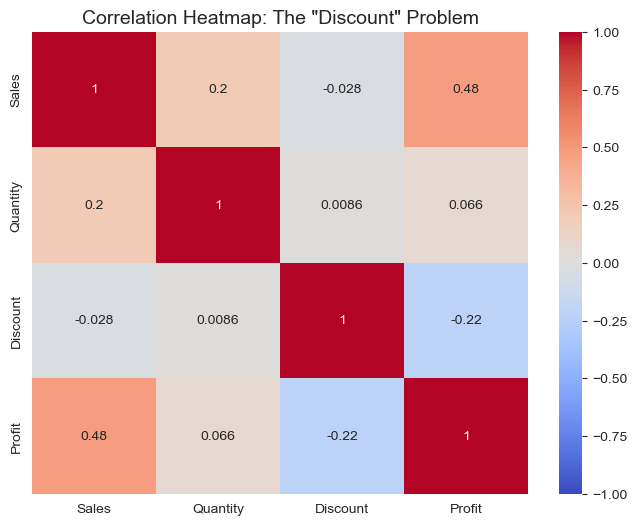


🧪 Hypothesis Test Results (T-Test):
   T-Statistic: -0.7418
   P-Value: 0.4583
❌ Result: NOT SIGNIFICANT. The difference could be due to random chance.


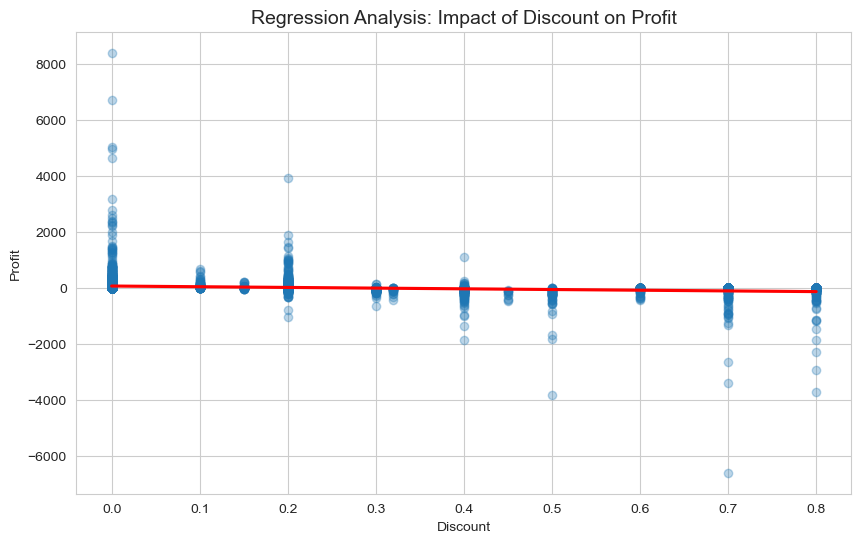

In [10]:
from scipy import stats
import numpy as np

# --- Part 1: Advanced Descriptive Statistics ---
# A Statistician looks at Skewness (is data lopsided?) and Kurtosis (are there outliers?)
sales_skew = df['Sales'].skew()
sales_kurt = df['Sales'].kurt()

print(f"📊 Statistical Distribution of Sales:")
print(f"   Skewness: {sales_skew:.2f} (Positive means most sales are small, with a few huge outliers)")
print(f"   Kurtosis: {sales_kurt:.2f} (High kurtosis means heavy outliers)")

# --- Part 2: Correlation Matrix (Pearson) ---
# We check the relationship between Numerical variables
corr_matrix = df[['Sales', 'Quantity', 'Discount', 'Profit']].corr()

print("\n🔗 Correlation Matrix:")
print(corr_matrix)

# Visualize the Correlation
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: The "Discount" Problem', fontsize=14)
plt.show()

# --- Part 3: Hypothesis Testing (The T-Test) ---
# Business Question: "Do Corporate customers spend significantly more than Consumers?"
# H0 (Null Hypothesis): There is NO difference in average sales between them.
# H1 (Alt Hypothesis): There IS a difference.

# 1. Create two groups
group_consumer = df[df['Segment'] == 'Consumer']['Sales']
group_corporate = df[df['Segment'] == 'Corporate']['Sales']

# 2. Run the T-Test
t_stat, p_value = stats.ttest_ind(group_consumer, group_corporate, equal_var=False)

print("\n🧪 Hypothesis Test Results (T-Test):")
print(f"   T-Statistic: {t_stat:.4f}")
print(f"   P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ Result: STATISTICALLY SIGNIFICANT. The difference is real.")
else:
    print("❌ Result: NOT SIGNIFICANT. The difference could be due to random chance.")

# --- Part 4: Regression Plot (Visualizing the Trend) ---
# Can we predict Profit based on Discount?
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Discount', y='Profit', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Regression Analysis: Impact of Discount on Profit', fontsize=14)
plt.show()